### Importing Libraries / setting variables

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

adding variables for longer names for easy access

In [108]:
df = pd.read_csv("data.csv")
sleepNormal = "On average, how many hours do you sleep daily?"
projectNum = "How many projects do you have per semester?"
sleepProject = "How many hours you sleep when you have projects/quizzes to do?"
screenTime = "How many hours is your phone screen time?"

In [109]:
df.dtypes

Timestamp                                                          object
Gender                                                             object
Age                                                                 int64
Major                                                              object
Academic Year                                                      object
CGPA                                                              float64
On average, how many hours do you sleep daily?                    float64
Does the time change whenever there are projects or quizzes?       object
How many projects do you have per semester?                         int64
How many hours you sleep when you have projects/quizzes to do?    float64
How many hours is your phone screen time?                         float64
Thank you!!!!                                                      object
dtype: object

removing the thank you column and from doing boxplot for the gpa the first time I noticed an outlier that had their gpa as 0 so it was removed as well

In [110]:
df.drop('Thank you!!!!', axis=1, inplace=True)
df = df[df['CGPA'] != 0]

### Mean/Median/Mode/Standard Error

In [111]:
mean1 = df[sleepNormal].mean()
mean2 = df[sleepProject].mean()
print(f"mean of usual sleep hours is {mean1}")
print(f"mean of sleep hours during projects is {mean2}")

mean of usual sleep hours is 6.693181818181818
mean of sleep hours during projects is 4.693181818181818


In [112]:
median1 = df[sleepNormal].median()
median2 = df[sleepProject].median()
print(f"median of usual sleep hours is {median1}")
print(f"median of sleep hours during projects is {median2}")

median of usual sleep hours is 7.0
median of sleep hours during projects is 5.0


In [113]:
mode1 =df[sleepNormal].mode()
mode2 =df[sleepProject].mode()
print(mode1)
print(mode2)

0    7.0
Name: On average, how many hours do you sleep daily?, dtype: float64
0    5.0
Name: How many hours you sleep when you have projects/quizzes to do?, dtype: float64


In [114]:
print(df[sleepNormal].std())
print(df[sleepProject].std())

1.4516066042889242
1.8777024217852023


In [115]:
print(df["CGPA"].mean())
print(df["CGPA"].mode())
print(df[screenTime].mean())
print(df[projectNum].mean())

2.9138636363636365
0    3.2
Name: CGPA, dtype: float64
5.284090909090909
3.3863636363636362


### CHARTS

#### Pie charts

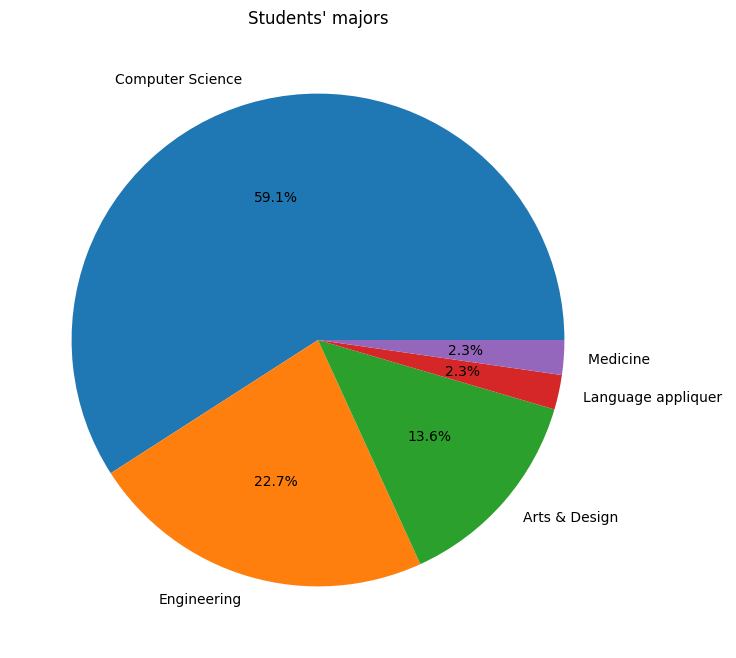

In [116]:
value_counts = df["Major"].value_counts()

plt.figure(figsize=(8, 8)) 
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title("Students' majors")
plt.show()

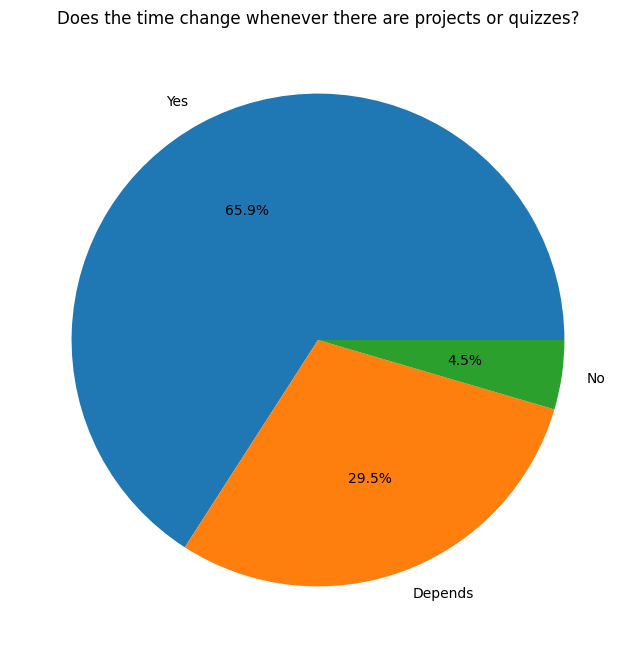

In [117]:

value_counts = df["Does the time change whenever there are projects or quizzes?"].value_counts()

plt.figure(figsize=(8, 8)) 
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title("Does the time change whenever there are projects or quizzes?")
plt.show()

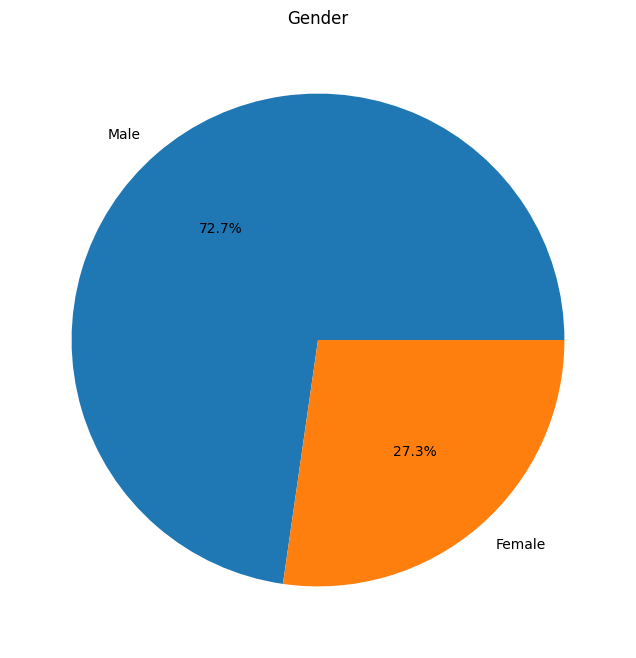

In [118]:
value_counts = df["Gender"].value_counts()

plt.figure(figsize=(8, 8)) 
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title("Gender")
plt.show()

#### Frequency Histograms and box plots

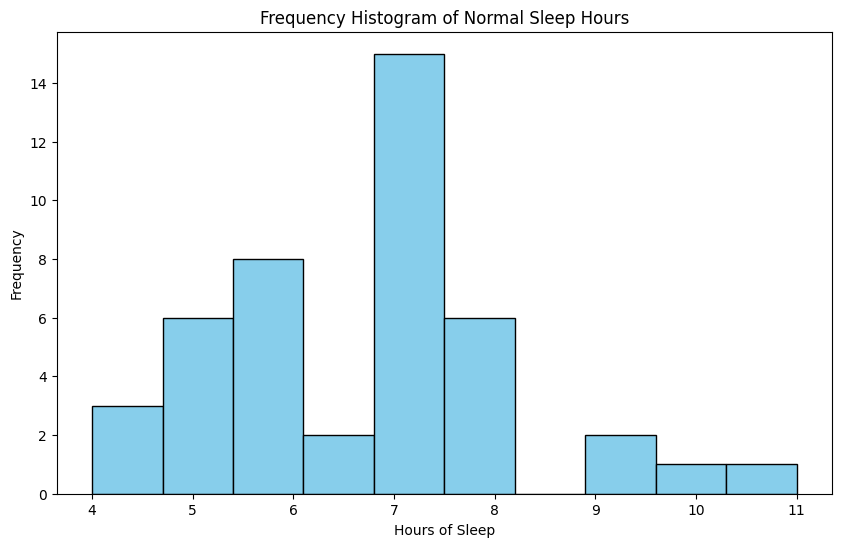

In [119]:
plt.figure(figsize=(10, 6))  
plt.hist(df[sleepNormal], bins=10, color='skyblue', edgecolor='black')  
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Normal Sleep Hours')

plt.show()

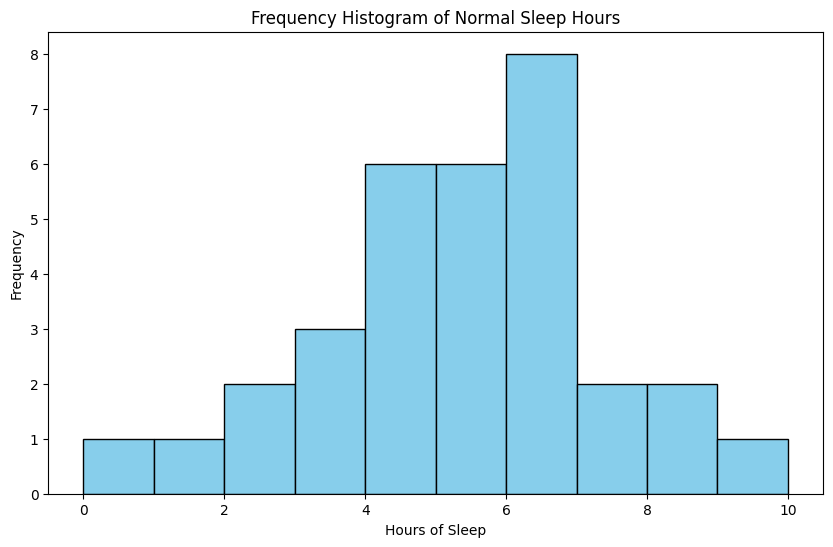

In [120]:
plt.figure(figsize=(10, 6))  
plt.hist(df[df["Gender"]=="Male"][sleepProject], bins=10, color='skyblue', edgecolor='black')  
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Normal Sleep Hours')

plt.show()

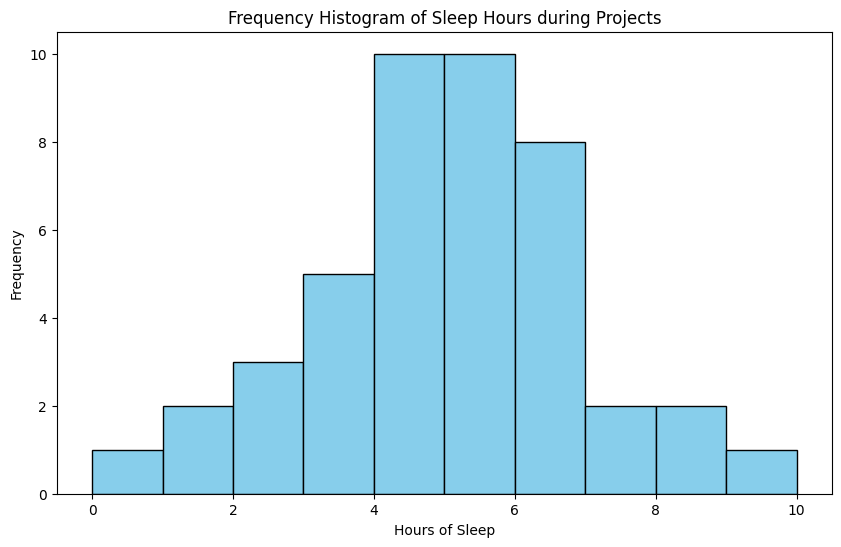

In [121]:
plt.figure(figsize=(10, 6))  
plt.hist(df[sleepProject], bins=10, color='skyblue', edgecolor='black')  
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Sleep Hours during Projects')

plt.show()

Text(0.5, 1.0, 'Boxplot - CGPA')

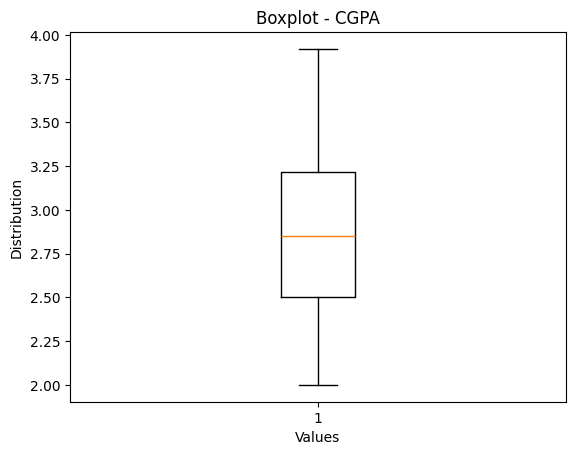

In [122]:
values = df["CGPA"]

plt.boxplot(values)

plt.xlabel('Values')
plt.ylabel('Distribution')
plt.title('Boxplot - CGPA')

Text(0.5, 1.0, 'Boxplot - Normal sleep hours')

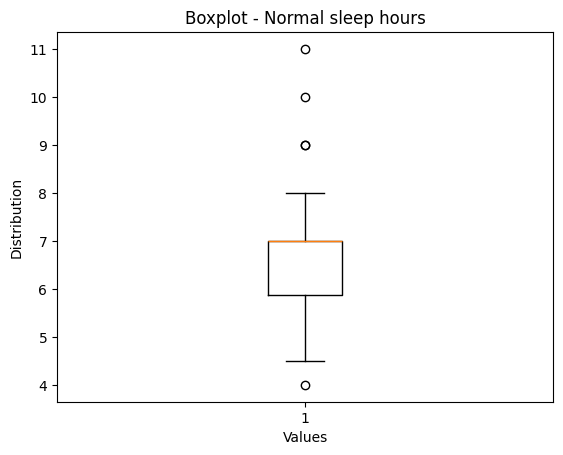

In [123]:
values = df[sleepNormal]

plt.boxplot(values)

plt.xlabel('Values')
plt.ylabel('Distribution')
plt.title('Boxplot - Normal sleep hours')

Text(0.5, 1.0, 'Boxplot - Sleep hours during projects')

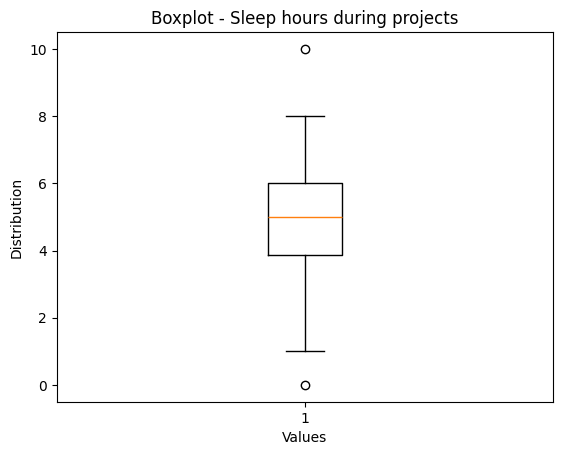

In [124]:
values = df[sleepProject]

plt.boxplot(values)

plt.xlabel('Values')
plt.ylabel('Distribution')
plt.title('Boxplot - Sleep hours during projects')

Since the histogram of the usual hours of sleep was not symmetrical I did a bootstrap to make sure the mean range is correct

In [125]:
bootstrap = pd.DataFrame({'mean_rating':[df.sample(500,replace=True)[sleepProject].mean() for i in range(0,1000)]})
bootstrap

,mean_rating
0,4.654
1,4.595
2,4.667
3,4.625
4,4.657
...,...
995,4.604
996,4.729
997,4.770
998,4.601


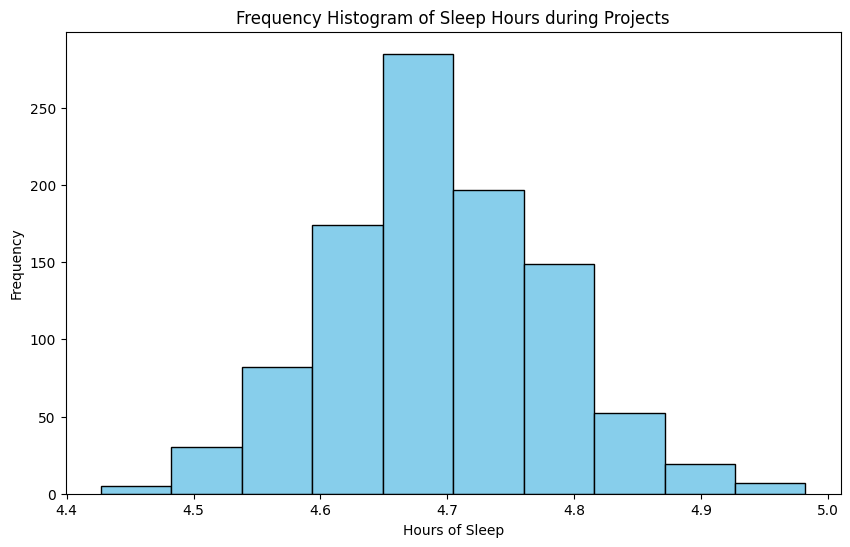

In [126]:
plt.figure(figsize=(10, 6))  
plt.hist(bootstrap, bins=10, color='skyblue', edgecolor='black')  
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Sleep Hours during Projects')

plt.show()

### CORRELATION

correlation between the number of projects and the hours of sleep during the project

In [127]:
correlation = df[projectNum].corr(df[sleepProject])
print("Correlation: " , correlation)

Correlation:  -0.0797663061566689


correlation between the usual number of hours of sleep and the hours of sleep during the project

In [128]:
correlation = df[sleepNormal].corr(df[sleepProject])
print("Correlation: ", correlation)

Correlation:  0.529911163870684


correlation between the usual number of hours of sleep and CGPA

In [129]:
correlation = df["CGPA"].corr(df[sleepNormal])
print("Correlation: " , correlation)

Correlation:  0.12496756402686826
